In [573]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [574]:
url = 'https://raw.githubusercontent.com/alec-carawan/datasets/main/Housing.csv'

housing = pd.read_csv(url)

In [575]:
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]
# There are no NULL values in the dataset, hence it is clean.

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

In [576]:
def compute_cost(X, y, theta):

 predictions = X.dot(theta)
 errors = np.subtract(predictions, y)
 sqrErrors = np.square(errors)
 J = 1 / (2 * m) * np.sum(sqrErrors)
 return J

def gradient_descent_validation(X_train, y_train, X_test, y_test, theta, alpha, iterations):

    X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
    X_b_test = np.c_[np.ones((len(X_test), 1)), X_test]

    cost_history = np.zeros(iterations)
    validation_loss = np.zeros(iterations)
    for i in range(iterations):
        predictions = X_b_train.dot(theta)
        errors = np.subtract(predictions, y_train)
        sum_delta = (alpha / m) * X_b_train.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X_b_train, y_train, theta)
        validation_loss[i] = compute_cost(X_b_test, y_test, theta)
    return theta, cost_history, validation_loss

In [577]:
# List of variables to map

varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [578]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

In [579]:
df_train

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,furnished
41,7840000,6360,3,2,4,1,0,0,0,1,0,1,furnished
91,6419000,6750,2,1,1,1,1,1,0,0,2,1,furnished
118,5950000,6420,3,1,1,1,0,1,0,1,0,1,furnished
472,3010000,3630,4,1,2,1,0,0,0,0,3,0,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,2310000,3180,2,1,1,1,0,0,0,0,0,0,unfurnished
53,7350000,5150,3,2,4,1,0,0,0,1,2,0,semi-furnished
350,3780000,3420,2,1,2,1,0,0,1,0,1,0,semi-furnished
79,6650000,6000,3,2,3,1,1,0,0,1,0,0,furnished


In [580]:

y_train = df_train.pop('price')
X_train = df_train

y_test = df_test.pop('price')
X_test = df_test

In [581]:
X_train = X_train.values[:, list(range(0, 4)) + [9]]
X_test = X_test.values[:, list(range(0, 4)) + [9]]
print(X_train.shape)
y = y_train
m = len(y) # Number of training examples

(436, 5)


In [582]:
#must limit # of interations and minimize stepsize, otherwise theta will escape 32 bit integer range expeditiously
theta = np.zeros(6)
iterations = 10
alpha = 0.01
m = len(X_train)

theta, cost_history, loss_val = gradient_descent_validation(X_train, y_train, X_test, y_test, theta, alpha, iterations)
print('Best parameters =', theta)

Best parameters = [-1.2038464292768258e+54 -7.274323899581185e+57 -3.589610112769705e+54
 -1.601854274528926e+54 -2.2182401719739206e+54 -1.0274620933893875e+54]


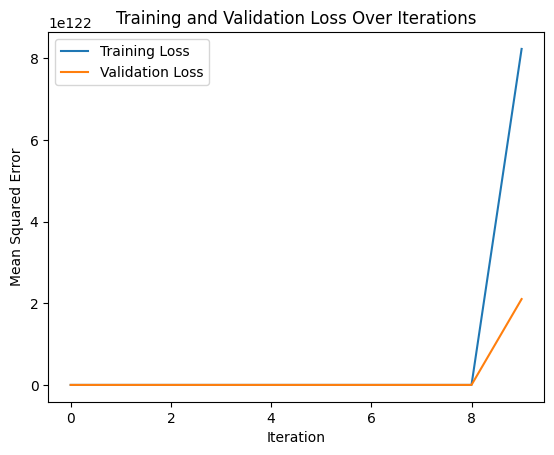

In [583]:
#plot final value for  theta against test data df_test
plt.plot(cost_history, label="Training Loss")
plt.plot(loss_val, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

Q1a

In [584]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

In [585]:
y_train = df_train.pop('price')
X_train = df_train

y_test = df_test.pop('price')
X_test = df_test

In [586]:
X_train = X_train.values[:, 0:11]
X_test = X_test.values[:, 0:11]
print(X_train.shape)
y = y_train
m = len(y) # Number of training examples

(436, 11)


In [587]:
#must limit # of interations and minimize stepsize, otherwise theta will escape 32 bit integer range expeditiously
theta = np.zeros(12)
iterations = 10
alpha = 0.01
m = len(X_train)

theta, cost_history, loss_val = gradient_descent_validation(X_train, y_train, X_test, y_test, theta, alpha, iterations)
print('Best parameters =', theta)

Best parameters = [-1.2038467897484778e+54 -7.274326053896078e+57 -3.5896111873083854e+54
 -1.601854753733637e+54 -2.2182408371304262e+54 -1.0913478203607926e+54
 -2.368385602335454e+53 -4.439458660727021e+53 -6.682719365185089e+52
 -4.091724600973348e+53 -1.0274623990795855e+54 -3.2509539192462547e+53]


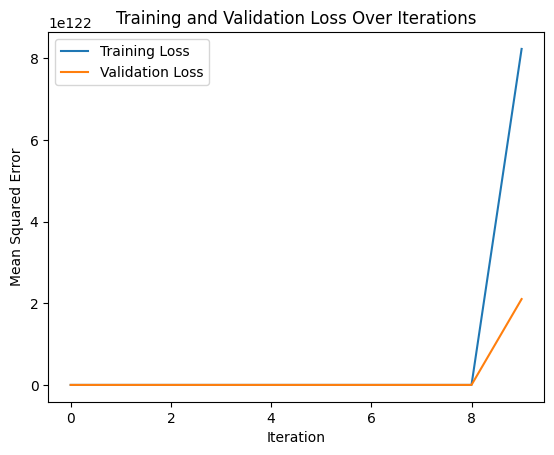

In [588]:
#plot final value for  theta against test data df_test
plt.plot(cost_history, label="Training Loss")
plt.plot(loss_val, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

Q1b

In [589]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

In [590]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,0.596970,0.432609,0.4,0.000000,0.000000,1,1,1,0,1,0.333333,0,furnished
41,0.527273,0.314954,0.4,0.333333,1.000000,1,0,0,0,1,0.000000,1,furnished
91,0.404242,0.342105,0.2,0.000000,0.000000,1,1,1,0,0,0.666667,1,furnished
118,0.363636,0.319131,0.4,0.000000,0.000000,1,0,1,0,1,0.000000,1,furnished
472,0.109091,0.124896,0.6,0.000000,0.333333,1,0,0,0,0,1.000000,0,semi-furnished


In [591]:
y_train = df_train.pop('price')
X_train = df_train
X_train.head()

y_test = df_test.pop('price')
X_test = df_test
X_test.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
265,0.088172,0.333333,0.0,0.333333,1,0,0,0,0,0.000000,1,semi-furnished
54,0.311828,0.333333,0.5,0.333333,1,1,0,0,1,0.333333,0,semi-furnished
171,0.617849,0.333333,0.0,0.000000,1,0,0,0,0,0.333333,1,semi-furnished
244,0.263082,0.333333,0.0,0.333333,1,1,1,0,0,0.000000,1,semi-furnished
268,0.236559,0.666667,0.0,0.333333,1,0,0,0,1,0.000000,0,semi-furnished


In [592]:
X_train = X_train.values[:, list(range(0, 4)) + [9]]
X_test = X_test.values[:, list(range(0, 4)) + [9]]
print(X_train.shape)
y = y_train
m = len(y) # Number of training examples

(436, 5)


In [593]:
theta = np.zeros(6)
iterations = 300
alpha = 0.06
m = len(X_train)

In [594]:
theta, cost_history, loss_val = gradient_descent_validation(X_train, y_train, X_test, y_test, theta, alpha, iterations)
print('Best parameters =', theta)

Best parameters = [0.10844020588023644 0.16783032299158768 0.09094810478437644
 0.15609765758943833 0.14288120476101737 0.1217924949933327]


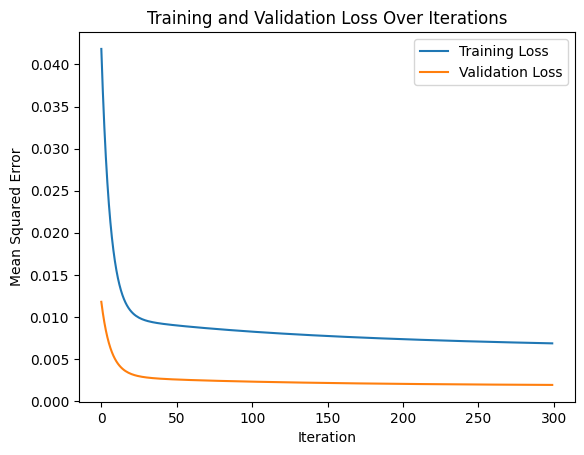

In [595]:
#plot final value for  theta against test data df_test
plt.plot(cost_history, label="Training Loss")
plt.plot(loss_val, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

Q2a (Normalization)

In [596]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

In [597]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,2.063847,1.351873,0.078679,-0.579897,-0.929023,1,1,1,0,1,0.311484,0,furnished
41,1.632233,0.565326,0.078679,1.410929,2.474792,1,0,0,0,1,-0.849261,1,furnished
91,0.870342,0.746837,-1.293483,-0.579897,-0.929023,1,1,1,0,0,1.472229,1,furnished
118,0.618880,0.593251,0.078679,-0.579897,-0.929023,1,0,1,0,1,-0.849261,1,furnished
472,-0.957447,-0.705249,1.450841,-0.579897,0.205582,1,0,0,0,0,2.632974,0,semi-furnished


In [598]:
y_train = df_train.pop('price')
X_train = df_train

y_test = df_test.pop('price')
X_test = df_test

X_train = X_train.values[:, list(range(0, 4)) + [9]]
X_test = X_test.values[:, list(range(0, 4)) + [9]]
print(X_train.shape)
y = y_train
m = len(y) # Number of training examples

(436, 5)


In [599]:
theta = np.zeros(6)
iterations = 300
alpha = 0.06
m = len(X_train)

theta, cost_history, loss_val = gradient_descent_validation(X_train, y_train, X_test, y_test, theta, alpha, iterations)
print('Best parameters =', theta)

Best parameters = [6.456608947797119e-17 0.39136471521605387 0.04254101266099775
 0.34382261617911436 0.24870045728287954 0.15405648735415994]


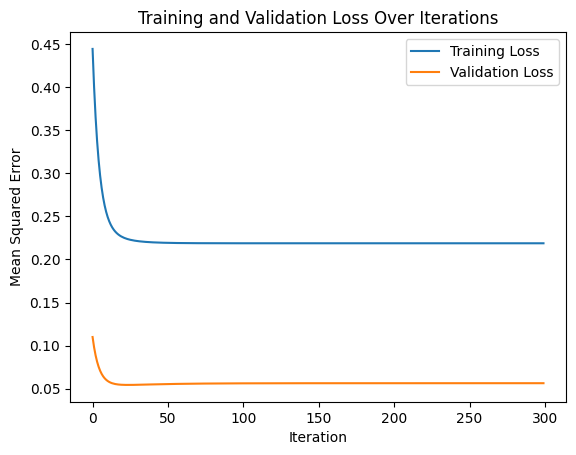

In [600]:
#plot final value for  theta against test data df_test
plt.plot(cost_history, label="Training Loss")
plt.plot(loss_val, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

Q2a (standardization)

In [601]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

In [602]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,0.596970,0.432609,0.4,0.000000,0.000000,1,1,1,0,1,0.333333,0,furnished
41,0.527273,0.314954,0.4,0.333333,1.000000,1,0,0,0,1,0.000000,1,furnished
91,0.404242,0.342105,0.2,0.000000,0.000000,1,1,1,0,0,0.666667,1,furnished
118,0.363636,0.319131,0.4,0.000000,0.000000,1,0,1,0,1,0.000000,1,furnished
472,0.109091,0.124896,0.6,0.000000,0.333333,1,0,0,0,0,1.000000,0,semi-furnished


In [603]:
y_train = df_train.pop('price')
X_train = df_train

y_test = df_test.pop('price')
X_test = df_test

X_train = X_train.values[:, 0:11]
X_test = X_test.values[:, 0:11]
print(X_train.shape)
y = y_train
m = len(y) # Number of training examples
print(y)

(436, 11)
22     0.596970
41     0.527273
91     0.404242
118    0.363636
472    0.109091
         ...   
526    0.048485
53     0.484848
350    0.175758
79     0.424242
520    0.060606
Name: price, Length: 436, dtype: float64


In [604]:
theta = np.zeros(12)
iterations = 300
alpha = 0.03
m = len(X_train)

theta, cost_history, loss_val = gradient_descent_validation(X_train, y_train, X_test, y_test, theta, alpha, iterations)
print('Best parameters =', theta)
print( cost_history)

Best parameters = [0.05646571191932785 0.07539890592890512 0.056731937369013614
 0.0867733306107217 0.09114260146814644 0.06925205825936519
 0.04572591490972464 0.027081159709255606 0.0370002319907797
 0.09362534906017185 0.07281002879380093 0.05585775452008831]
[0.04209302 0.03720403 0.03302022 0.02943941 0.02637426 0.02375008
 0.02150299 0.01957838 0.01792955 0.01651656 0.01530527 0.01426647
 0.0133752  0.01261011 0.01195293 0.01138806 0.01090215 0.01048378
 0.01012318 0.00981202 0.00954315 0.00931047 0.00910876 0.00893356
 0.00878104 0.00864795 0.0085315  0.00842928 0.00833928 0.00825973
 0.00818915 0.00812625 0.00806995 0.00801931 0.00797354 0.00793194
 0.00789394 0.00785904 0.0078268  0.00779686 0.00776891 0.00774267
 0.00771793 0.00769448 0.00767215 0.00765081 0.00763032 0.00761058
 0.00759151 0.00757302 0.00755505 0.00753753 0.00752043 0.0075037
 0.0074873  0.0074712  0.00745537 0.0074398  0.00742446 0.00740933
 0.0073944  0.00737966 0.0073651  0.0073507  0.00733646 0.00732237
 

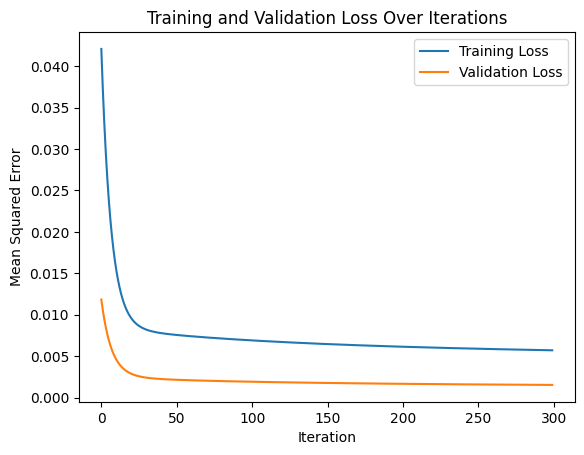

In [605]:
#plot final value for  theta against test data df_test
plt.plot(cost_history, label="Training Loss")
plt.plot(loss_val, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

Q2b (Normalization)

In [606]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

In [607]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
22,2.063847,1.351873,0.078679,-0.579897,-0.929023,1,1,1,0,1,0.311484,0,furnished
41,1.632233,0.565326,0.078679,1.410929,2.474792,1,0,0,0,1,-0.849261,1,furnished
91,0.870342,0.746837,-1.293483,-0.579897,-0.929023,1,1,1,0,0,1.472229,1,furnished
118,0.618880,0.593251,0.078679,-0.579897,-0.929023,1,0,1,0,1,-0.849261,1,furnished
472,-0.957447,-0.705249,1.450841,-0.579897,0.205582,1,0,0,0,0,2.632974,0,semi-furnished


In [608]:
y_train = df_train.pop('price')
X_train = df_train

y_test = df_test.pop('price')
X_test = df_test

X_train = X_train.values[:, 0:11]
X_test = X_test.values[:, 0:11]
print(X_train.shape)
y = y_train
m = len(y) # Number of training examples
print(y)

(436, 11)
22     2.063847
41     1.632233
91     0.870342
118    0.618880
472   -0.957447
         ...   
526   -1.332762
53     1.369512
350   -0.544599
79     0.994196
520   -1.257699
Name: price, Length: 436, dtype: float64


In [609]:
theta = np.zeros(12)
iterations = 300
alpha = 0.06
m = len(X_train)

theta, cost_history, loss_val = gradient_descent_validation(X_train, y_train, X_test, y_test, theta, alpha, iterations)
print('Best parameters =', theta)
print( cost_history)

Best parameters = [-0.4293081008374846 0.3074696873411716 0.03331133022439249
 0.31171397932700984 0.21549469473545035 0.16156068128626397
 0.19708393088606616 0.17126461100352636 0.2469915584225428
 0.4027521244291529 0.1331790209577755 0.3075529759602906]
[0.43973894 0.39227468 0.35479411 0.32511215 0.30153011 0.28272621
 0.26767103 0.25556201 0.24577283 0.23781416 0.23130323 0.22594025
 0.22149011 0.21776812 0.21462901 0.21195826 0.20966547 0.2076791
 0.2059424  0.20441026 0.20304671 0.20182298 0.200716   0.19970719
 0.1987815  0.19792675 0.19713298 0.19639204 0.1956972  0.19504289
 0.19442448 0.19383807 0.19328037 0.19274859 0.19224036 0.19175361
 0.19128657 0.19083769 0.19040561 0.18998913 0.18958719 0.18919885
 0.18882324 0.18845961 0.18810725 0.18776555 0.18743391 0.18711183
 0.1867988  0.18649439 0.18619818 0.18590979 0.18562887 0.18535508
 0.18508812 0.1848277  0.18457354 0.18432541 0.18408305 0.18384624
 0.18361478 0.18338847 0.18316711 0.18295054 0.18273858 0.18253107
 0.182

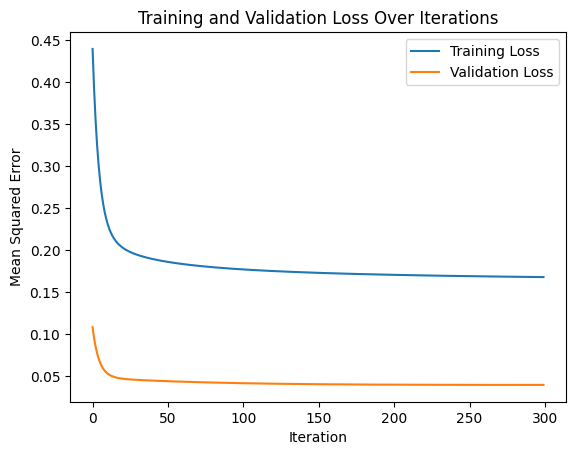

In [610]:
#plot final value for  theta against test data df_test
plt.plot(cost_history, label="Training Loss")
plt.plot(loss_val, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

Q2b (standardization)

In [611]:
def penalized_cost(X, y, theta, lamb):

    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    regularization = np.square(theta)
    J = (1 / (2 * m)) * (np.sum(sqrErrors) + lamb * np.sum(regularization))
    return J

def penalized_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations, lamb):

    X_b_train = np.c_[np.ones((len(X_train), 1)), X_train]
    X_b_test = np.c_[np.ones((len(X_test), 1)), X_test]

    cost_history = np.zeros(iterations)
    validation_loss = np.zeros(iterations)
    for i in range(iterations):
        predictions = X_b_train.dot(theta)
        errors = np.subtract(predictions, y_train)
        sum_delta = (alpha / m) * X_b_train.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = penalized_cost(X_b_train, y_train, theta, lamb)
        validation_loss[i] = compute_cost(X_b_test, y_test, theta)
    return theta, cost_history, validation_loss

In [612]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

y_train = df_train.pop('price')
X_train = df_train

y_test = df_test.pop('price')
X_test = df_test

X_train = X_train.values[:, list(range(0, 4)) + [9]]
X_test = X_test.values[:, list(range(0, 4)) + [9]]
print(X_train.shape)
y = y_train

theta = np.zeros(6)
iterations = 300
alpha = 0.06
lamb = 0.4

(436, 5)


In [613]:
theta, cost_history, loss_val = penalized_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations, lamb)
print('Best parameters =', theta)

Best parameters = [0.10844020588023644 0.16783032299158768 0.09094810478437644
 0.15609765758943833 0.14288120476101737 0.1217924949933327]


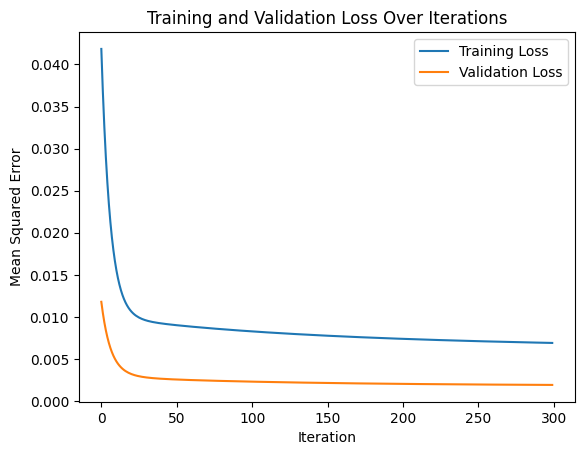

In [614]:
#plot final value for  theta against test data df_test
plt.plot(cost_history, label="Training Loss")
plt.plot(loss_val, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

Q3a (Normalization)

In [615]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

y_train = df_train.pop('price')
X_train = df_train

y_test = df_test.pop('price')
X_test = df_test

X_train = X_train.values[:, list(range(0, 4)) + [9]]
X_test = X_test.values[:, list(range(0, 4)) + [9]]
print(X_train.shape)
y = y_train

theta = np.zeros(6)
iterations = 300
alpha = 0.06
lamb = 0.4

(436, 5)


Best parameters = [6.456608947797119e-17 0.39136471521605387 0.04254101266099775
 0.34382261617911436 0.24870045728287954 0.15405648735415994]


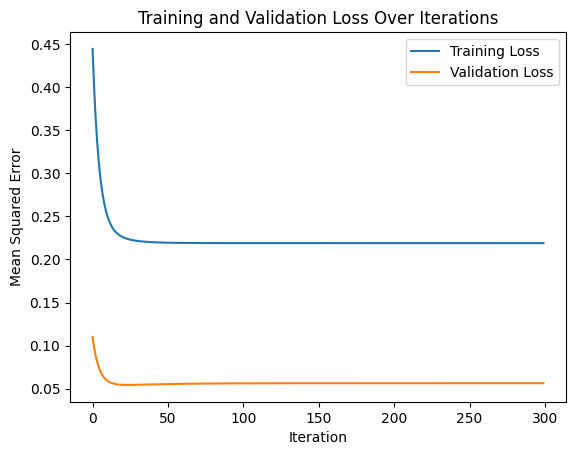

In [616]:
theta, cost_history, loss_val = penalized_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations, lamb)
print('Best parameters =', theta)

#plot final value for  theta against test data df_test
plt.plot(cost_history, label="Training Loss")
plt.plot(loss_val, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

Q3a (standardization)

In [617]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

y_train = df_train.pop('price')
X_train = df_train

y_test = df_test.pop('price')
X_test = df_test

X_train = X_train.values[:, 0:11]
X_test = X_test.values[:, 0:11]
print(X_train.shape)
y = y_train

theta = np.zeros(12)
iterations = 300
alpha = 0.06
lamb = 0.4

(436, 11)


Best parameters = [0.03392312764860205 0.1128595448659359 0.06409557161700907
 0.13580236865296522 0.11089540652526395 0.06143413547760482
 0.04949481806342653 0.024754122949966154 0.0570870172887209
 0.09330138624126987 0.08960340370880616 0.0601603917136113]


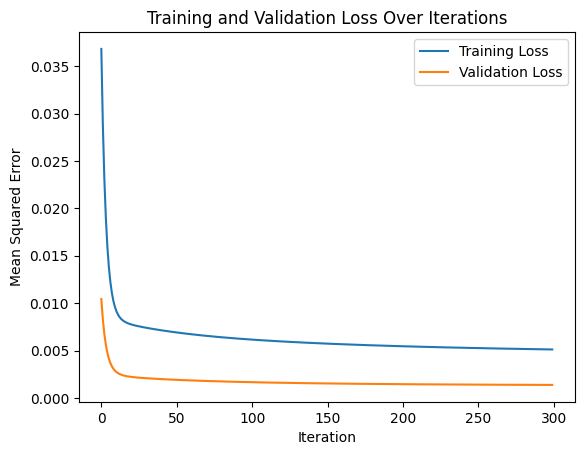

In [618]:
theta, cost_history, loss_val = penalized_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations, lamb)
print('Best parameters =', theta)

#plot final value for  theta against test data df_test
plt.plot(cost_history, label="Training Loss")
plt.plot(loss_val, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

Q3b (Normalization)

In [619]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

y_train = df_train.pop('price')
X_train = df_train

y_test = df_test.pop('price')
X_test = df_test

X_train = X_train.values[:, 0:11]
X_test = X_test.values[:, 0:11]
print(X_train.shape)
y = y_train

theta = np.zeros(12)
iterations = 300
alpha = 0.06
lamb = 0.4

(436, 11)


Best parameters = [-0.4293081008374846 0.3074696873411716 0.03331133022439249
 0.31171397932700984 0.21549469473545035 0.16156068128626397
 0.19708393088606616 0.17126461100352636 0.2469915584225428
 0.4027521244291529 0.1331790209577755 0.3075529759602906]


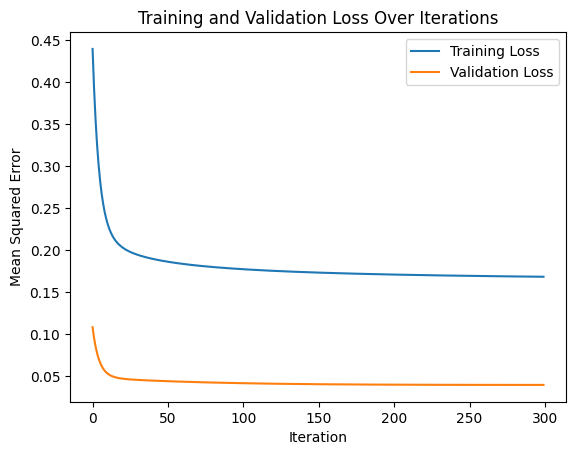

In [620]:
theta, cost_history, loss_val = penalized_descent(X_train, y_train, X_test, y_test, theta, alpha, iterations, lamb)
print('Best parameters =', theta)

#plot final value for  theta against test data df_test
plt.plot(cost_history, label="Training Loss")
plt.plot(loss_val, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

Q3b (standardization)